# Изучение тарифов для телеком компании


# Цель:

Основная цель проекта это проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Задача:

- Подготовить данные к анализу;

- Проанализировать данные;

- Проверить гипотезы;

- Напивать общий вывод.

# Описание тарифов

- Тариф «Смарт»

Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

- Тариф «Ультра»

Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

# Аббревиатуры:


## Датасет *users.csv*:

- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана

## Датасет *calls.csv*:

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

## Датасет *messages.csv*:

- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

## Датасет *internet.csv*:

- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

## Датасет *tariffs.csv*:

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


# Шаг 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import plotly.graph_objects as go
from math import factorial
warnings.filterwarnings('ignore')
data_calls = pd.read_csv("/datasets/calls.csv")
data_internet = pd.read_csv("/datasets/internet.csv")
data_messages = pd.read_csv("/datasets/messages.csv")
data_tariffs = pd.read_csv("/datasets/tariffs.csv")
data_users = pd.read_csv("/datasets/users.csv")
display(data_calls)
display(data_internet)
display(data_messages)
display(data_tariffs)
display(data_users)



,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [2]:
#Анализ данных 
datas = [data_calls, data_internet ,data_messages, data_tariffs , data_users]
for file in datas:
    display(file.describe())
for info in datas:
    display(info.info())


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

In [3]:
#Анализ уникальных названий и пропусков
def info(data):
 
    for column in data.columns:
 
        if data[column].dtype == 'object':
            print(column) 
            print(data[column].unique()) 
            print() 
 
        else:
            print(column)
            print(data.isnull().sum())
display(info(data_calls))
display(info(data_internet))
display(info(data_messages))
display(info(data_tariffs))
display(info(data_users))

id
['1000_0' '1000_1' '1000_2' ... '1499_217' '1499_218' '1499_219']

call_date
['2018-07-25' '2018-08-17' '2018-06-11' '2018-09-21' '2018-12-15'
 '2018-11-02' '2018-10-18' '2018-08-22' '2018-09-15' '2018-08-15'
 '2018-05-28' '2018-07-05' '2018-09-29' '2018-12-11' '2018-07-27'
 '2018-08-11' '2018-08-02' '2018-06-15' '2018-12-04' '2018-08-20'
 '2018-09-25' '2018-07-21' '2018-08-27' '2018-08-25' '2018-12-12'
 '2018-07-19' '2018-11-14' '2018-12-26' '2018-12-02' '2018-10-08'
 '2018-09-23' '2018-10-09' '2018-05-25' '2018-06-13' '2018-10-25'
 '2018-12-29' '2018-07-12' '2018-11-20' '2018-06-05' '2018-10-13'
 '2018-06-26' '2018-07-14' '2018-07-20' '2018-12-01' '2018-06-17'
 '2018-10-24' '2018-11-26' '2018-09-19' '2018-05-30' '2018-12-21'
 '2018-12-23' '2018-07-03' '2018-10-04' '2018-09-16' '2018-11-21'
 '2018-10-28' '2018-08-29' '2018-08-13' '2018-07-18' '2018-06-03'
 '2018-09-03' '2018-08-14' '2018-11-01' '2018-05-26' '2018-11-23'
 '2018-09-30' '2018-11-09' '2018-08-01' '2018-06-18' '2018-10-

None

Unnamed: 0
Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64
id
['1000_0' '1000_1' '1000_2' ... '1499_154' '1499_155' '1499_156']

mb_used
Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64
session_date
['2018-11-25' '2018-09-07' '2018-06-25' '2018-08-22' '2018-09-24'
 '2018-10-02' '2018-07-11' '2018-10-08' '2018-09-03' '2018-09-27'
 '2018-08-28' '2018-06-20' '2018-08-09' '2018-08-11' '2018-07-21'
 '2018-06-09' '2018-06-03' '2018-11-01' '2018-11-28' '2018-08-20'
 '2018-12-06' '2018-07-02' '2018-10-19' '2018-10-30' '2018-06-17'
 '2018-11-06' '2018-09-14' '2018-11-15' '2018-08-26' '2018-10-15'
 '2018-11-27' '2018-10-17' '2018-10-07' '2018-08-05' '2018-07-06'
 '2018-10-03' '2018-11-02' '2018-06-30' '2018-11-17' '2018-06-06'
 '2018-11-20' '2018-05-31' '2018-10-29' '2018-12-10' '2018-07-04'
 '2018-12-28' '2018-05-28' '2018-09-15' '2018-09-09' '2018-09-17'
 '2018-09-01' '2018-11-03' '2018

None

id
['1000_0' '1000_1' '1000_2' ... '1499_181' '1499_182' '1499_183']

message_date
['2018-06-27' '2018-10-08' '2018-08-04' '2018-06-16' '2018-12-05'
 '2018-06-20' '2018-11-19' '2018-10-29' '2018-06-25' '2018-12-18'
 '2018-05-30' '2018-07-06' '2018-08-20' '2018-10-30' '2018-09-14'
 '2018-08-28' '2018-06-29' '2018-07-07' '2018-05-29' '2018-05-28'
 '2018-08-15' '2018-07-29' '2018-12-07' '2018-12-25' '2018-10-31'
 '2018-07-30' '2018-11-05' '2018-12-15' '2018-12-04' '2018-06-30'
 '2018-12-22' '2018-10-02' '2018-08-29' '2018-09-09' '2018-07-19'
 '2018-09-04' '2018-07-15' '2018-10-25' '2018-12-08' '2018-06-01'
 '2018-06-12' '2018-12-21' '2018-10-07' '2018-08-30' '2018-06-04'
 '2018-10-01' '2018-06-22' '2018-10-12' '2018-10-15' '2018-10-24'
 '2018-09-20' '2018-08-22' '2018-09-17' '2018-08-27' '2018-07-26'
 '2018-06-05' '2018-11-16' '2018-09-06' '2018-11-26' '2018-11-18'
 '2018-09-21' '2018-07-11' '2018-07-16' '2018-11-08' '2018-07-25'
 '2018-09-13' '2018-08-13' '2018-12-31' '2018-06-10' '2018-

None

messages_included
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64
mb_per_month_included
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64
minutes_included
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64
rub_monthly_fee
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64
rub_per_gb


None

user_id
user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64
age
user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64
churn_date
[nan '2018-10-05' '2018-12-18' '2018-11-21' '2018-10-03' '2018-10-14'
 '2018-12-09' '2018-12-11' '2018-12-26' '2018-08-31' '2018-12-03'
 '2018-12-23' '2018-11-07' '2018-12-16' '2018-12-20' '2018-11-30'
 '2018-12-21' '2018-08-17' '2018-09-02' '2018-10-04' '2018-11-13'
 '2018-11-22' '2018-10-28' '2018-11-26' '2018-11-27' '2018-11-16'
 '2018-10-27' '2018-12-30' '2018-09-27' '2018-12-25' '2018-12-14'
 '2018-12-24' '2018-09-26' '2018-10-25']

city
['Краснодар' 'Москва' 'Стерлитамак' 'Новокузнецк' 'Набережные Челны'
 'Ульяновск' 'Челябинск' 'Пермь' 'Тюмень' 'Самара' 'Санкт-Петербург'
 'Иваново' 'Чебоксары' 'Омск' 'Уфа' 'Томск' 'Чита' 'Мурманск'
 'Петрозаводск' 

None

# Шаг 1: Вывод
После различных способов анализа данных, можно утверждать, что пропусков мало и не составит труда их исправить. Так же я не нашел критических искожений в данных, надо будет только поменять формат некоторых столбцов. Данных очень много и они разбиты в разных файлов, при попытке их объеденения, я потерпел неудачу, так как не во всех файлах есть общие столбцы, так что я решил ничего не трогать, так как могу искозать информацию. Так же появились столбцы, с названием "Unnamed", нужно будет решить убирать их или нет.

Я решил не удалять и ничего не делать с данными, где длительность звонков равно 0. Так как при объеденении столбцов, я считал сумму минут в месяц, эти данные никак не мешали моим расчетам, а если бы я удалил это нулевые значение, то потерял бы данные в других столбцах.

## Шаг 2

In [4]:
#Привести данные к нужным типам
data_calls["duration"] = np.ceil(data_calls["duration"]).astype("int")
data_internet["mb_used"] = np.ceil(data_internet["mb_used"]).astype("int")
data_calls["call_date"] = pd.to_datetime(data_calls["call_date"])
data_internet["session_date"] = pd.to_datetime(data_internet["session_date"])
data_messages["message_date"] = pd.to_datetime(data_messages["message_date"])
data_users["reg_date"] = pd.to_datetime(data_users["reg_date"])

In [5]:
#Исправить ошибки в данных 
data_users["churn_date"] = data_users["churn_date"].fillna("Тариф действует")
display(data_users["churn_date"].isnull().sum())
data_internet.drop(["Unnamed: 0"], axis = 1, inplace = True)
display(data_internet)

0

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000
...,...,...,...,...
149391,1499_152,319,2018-10-03,1499
149392,1499_153,491,2018-12-14,1499
149393,1499_154,0,2018-10-27,1499
149394,1499_155,1247,2018-11-26,1499


In [6]:
data_calls["month"] = data_calls["call_date"].dt.month
data_internet["month"] = data_internet["session_date"].dt.month
data_messages["month"] = data_messages["message_date"].dt.month
#data_users["reg_date"] = data_users["reg_date"].dt.month

In [7]:
data_calls_group = data_calls.groupby(["user_id","month"]).sum().reset_index()
display(data_calls_group)
data_internet_group = data_internet.groupby(["user_id","month"]).sum().reset_index()
display(data_internet_group)
data_messages_group = data_messages.groupby(["user_id","month"]).count().reset_index()
display(data_messages_group)

,user_id,month,duration
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466
...,...,...,...
3169,1498,10,247
3170,1499,9,70
3171,1499,10,449
3172,1499,11,612


,user_id,month,mb_used
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581
...,...,...,...
3198,1498,10,20604
3199,1499,9,1848
3200,1499,10,17809
3201,1499,11,17984


,user_id,month,id,message_date
0,1000,5,22,22
1,1000,6,60,60
2,1000,7,75,75
3,1000,8,81,81
4,1000,9,57,57
...,...,...,...,...
2712,1498,10,42,42
2713,1499,9,11,11
2714,1499,10,48,48
2715,1499,11,59,59


In [8]:
#Объеденение столбцов
datas_month = data_calls_group.merge(data_internet_group, on = ["user_id", "month"], how = "outer")
datas_month_2 = datas_month.merge(data_messages_group, on = ["user_id", "month"], how = "outer")
display(datas_month_2)
datas_month_3 = datas_month_2.merge(data_users, on =["user_id"], how = "outer")
display(datas_month_3)
#Объеденение таблиц по столбцу tariff
data_tariffs.rename(columns = {"tariff_name" : "tariff"}, inplace = True)
all_datas = datas_month_3.merge(data_tariffs, on = "tariff", how = "outer")
display(all_datas)
#Теперь когда я имею общую таблицу, могу начать проводить различные манипуляции. 
#По ходу сборки общей таблицы, я высчитал разные средние параметры такие как отправленые сообщения за каждый месяц
#Эти данные можно увидеть ниже

,user_id,month,duration,mb_used,id,message_date
0,1000,5,159.0,2256.0,22.0,22.0
1,1000,6,172.0,23257.0,60.0,60.0
2,1000,7,340.0,14016.0,75.0,75.0
3,1000,8,408.0,14070.0,81.0,81.0
4,1000,9,466.0,14581.0,57.0,57.0
...,...,...,...,...,...,...
3209,1489,8,NaN,11066.0,17.0,17.0
3210,1489,9,NaN,17232.0,32.0,32.0
3211,1489,10,NaN,19588.0,21.0,21.0
3212,1489,11,NaN,17516.0,20.0,20.0


,user_id,month,duration,mb_used,id,message_date,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,159.0,2256.0,22.0,22.0,52,Тариф действует,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,172.0,23257.0,60.0,60.0,52,Тариф действует,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,340.0,14016.0,75.0,75.0,52,Тариф действует,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,408.0,14070.0,81.0,81.0,52,Тариф действует,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,466.0,14581.0,57.0,57.0,52,Тариф действует,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10.0,NaN,19588.0,21.0,21.0,35,Тариф действует,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,11.0,NaN,17516.0,20.0,20.0,35,Тариф действует,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3213,1489,12.0,NaN,17341.0,35.0,35.0,35,Тариф действует,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3214,1128,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra


,user_id,month,duration,mb_used,id,message_date,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,159.0,2256.0,22.0,22.0,52,Тариф действует,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,172.0,23257.0,60.0,60.0,52,Тариф действует,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,340.0,14016.0,75.0,75.0,52,Тариф действует,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,408.0,14070.0,81.0,81.0,52,Тариф действует,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,466.0,14581.0,57.0,57.0,52,Тариф действует,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,9.0,NaN,17232.0,32.0,32.0,35,Тариф действует,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3212,1489,10.0,NaN,19588.0,21.0,21.0,35,Тариф действует,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3213,1489,11.0,NaN,17516.0,20.0,20.0,35,Тариф действует,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3214,1489,12.0,NaN,17341.0,35.0,35.0,35,Тариф действует,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3


In [9]:
display(all_datas.isnull().sum())
#Я решил удалить строки где были проруски, так как их мало и эти пропуски могли повлиять на конечный вывод
#Некоторые можно было бы заменить, как например импользованых мегабайтов, наверное если строка неизвсетная, то можно было бы предполодить, что человек не использовал интеренет в этом месяце.
#Но мне слабо в это вериться, что такое может быть, так как в нашей современной жизнт это практически невозможно, так что я принял такие ошибки как ошибка сбора данных самой компанией

user_id                    0
month                      2
duration                  42
mb_used                   13
id                       499
message_date             499
age                        0
churn_date                 0
city                       0
first_name                 0
last_name                  0
reg_date                   0
tariff                     0
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

In [10]:
all_datas.dropna(subset = ["month"], inplace = True)
all_datas["duration"] = all_datas["duration"].fillna(0)
all_datas["mb_used"] = all_datas["mb_used"].fillna(0)


In [11]:
all_datas["gb_used"] = (all_datas["mb_used"] / 1024).round()
all_datas["gb_per_month_included"] = (all_datas["mb_per_month_included"] / 1024).round()

In [12]:
#Помесячная выручка с каждого пользователя в месяц

def total_receipts(data):
    total = 0
    if data['duration'] > data['minutes_included']: 
        total += (data['duration'] - data['minutes_included']) * data['rub_per_minute']
 
    if data['message_date'] > data['messages_included']: 
        total += (data['message_date'] - data['messages_included']) * data['rub_per_message']
 
    if data['mb_used'] > data['mb_per_month_included']: 
        total += (data['gb_used'] - data['gb_per_month_included']) * data['rub_per_gb']
    
    total = total + data['rub_monthly_fee']
 
    return total
 
all_datas['month_receipts'] = all_datas.apply(total_receipts, axis = 1)
all_datas.head()

,user_id,month,duration,mb_used,id,message_date,age,churn_date,city,first_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_used,gb_per_month_included,month_receipts
0,1000,5.0,159.0,2256.0,22.0,22.0,52,Тариф действует,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,2.0,30.0,1950.0
1,1000,6.0,172.0,23257.0,60.0,60.0,52,Тариф действует,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,23.0,30.0,1950.0
2,1000,7.0,340.0,14016.0,75.0,75.0,52,Тариф действует,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,14.0,30.0,1950.0
3,1000,8.0,408.0,14070.0,81.0,81.0,52,Тариф действует,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,14.0,30.0,1950.0
4,1000,9.0,466.0,14581.0,57.0,57.0,52,Тариф действует,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,14.0,30.0,1950.0


# Вывод: Шаг 2

Во втором шаге я поменял тип данных, что позволило мне легче объединять таблицы и при расчетах не было бы никаких больших значений после запятой. Так же я исправил ошибки, в стобце churn_date, где заменил пропуски на то, что пользователи продолжают пользоваться тем же оператором. Я решил не удалять и ничего не делать с данными, где длительность звонков равно 0. Так как при объединении столбцов, я считал сумму минут в месяц, эти данные никак не мешали моим расчетам. После этого у меня начались вычисление, и соединение всех столбцов. Пока рано делать какие-либо выводы из данных, но я сформировал таблицу так, чтобы в дальнейшем смог бы проще сделать какие-либо выводы.

# Шаг 3

In [13]:
#Сколько минут разговора, сколько сообщений 
#и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц
#Среднее количество в месяц
all_datas.rename(columns = {"message_date" : "sms_qty"}, inplace = True)
datas_mean = all_datas.groupby(["month","tariff"])["duration", "mb_used", "sms_qty"].mean()
datas_mean

duration       mb_used    sms_qty
month tariff                                     
1.0   smart   203.852941   8524.441176  20.000000
      ultra   428.111111  13153.555556  43.428571
2.0   smart   298.689655  11611.396552  27.940000
      ultra   297.125000  11786.958333  32.937500
3.0   smart   390.051948  15123.857143  35.550725
      ultra   489.648649  17551.972973  47.800000
4.0   smart   367.133929  13479.482143  35.864583
      ultra   458.018182  16843.800000  44.512821
5.0   smart   387.361702  15825.198582  39.032787
      ultra   510.328358  19381.194030  48.769231
6.0   smart   395.640244  15814.768293  38.577465
      ultra   479.702381  18942.238095  52.313433
7.0   smart   408.353234  15763.512438  38.988506
      ultra   545.791209  20514.648352  62.136986
8.0   smart   421.468085  16632.174468  38.750000
      ultra   510.775701  19594.065421  58.897727
9.0   smart   428.611538  16324.526923  39.219731
      ultra   539.443478  19222.208696  63.294737
10.0  smart   426.136054  16778.564626  39.082677
      ultra   558.081301  20063.869919  69.776699
11.0  smart   435.265823  16917.531646  39.881481
      ultra   541.380597  19805.313433  66.159292
12.0  smart   478.560831  18136.833828  42.264808
      ultra   592.805755  21813.589928  72.008547

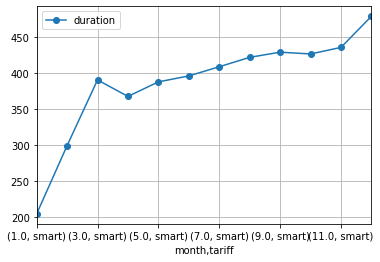

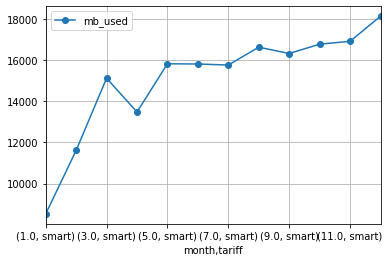

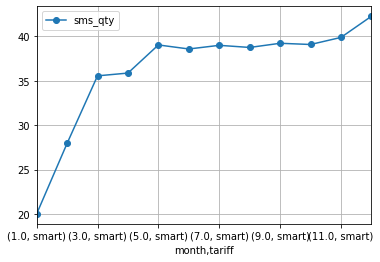

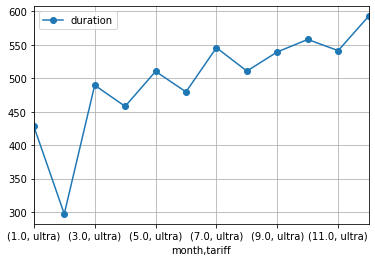

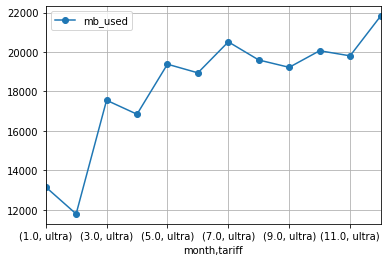

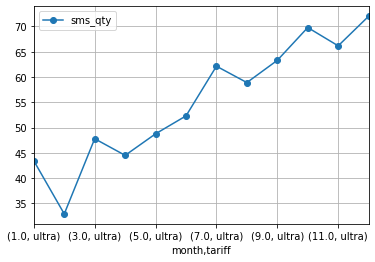

In [14]:
#Строим график для средней
datas_smart_mean = datas_mean.query('tariff == "smart"')
for y in datas_smart_mean:
    datas_smart_mean.plot( y = y, style = "o-", grid = True)
    plt.show()
datas_ultra_mean = datas_mean.query('tariff == "ultra"')
for y in datas_ultra_mean:
    datas_ultra_mean.plot( y = y, style = "o-", grid = True)
    plt.show()

Можно няглядно, увидеть пользователи с пакетом ультра используют больше смс, интрнета и минут звонков. Но поведение примерно одинаковы, чем ближе к новому году, тем все значение увеличиваются, а сразу после резко падают. Можно предроложить, что людт к новому году начинают активно друг друга поздравлять.

In [15]:
#Дисперсия
smart_var = np.var(datas_smart_mean)
ultra_var = np.var(datas_ultra_mean)
display(smart_var)
display(ultra_var)

duration    4.786647e+03
mb_used     6.558037e+06
sms_qty     3.557279e+01
dtype: float64

duration    5.498637e+03
mb_used     8.187319e+06
sms_qty     1.329392e+02
dtype: float64

In [16]:
#Стандартное отклонение
print(np.sqrt(smart_var))
print()
print(np.sqrt(ultra_var))

duration      69.185601
mb_used     2560.866440
sms_qty        5.964293
dtype: float64

duration      74.152798
mb_used     2861.349186
sms_qty       11.529926
dtype: float64


In [17]:
#Средняя, медианная и суммарная выручка с пользователей с разным тарифом
tariff_mean = all_datas.groupby("tariff")["month_receipts"].mean().reset_index()
tariff_median = all_datas.groupby("tariff")["month_receipts"].median().reset_index()
tariff_sum = all_datas.groupby("tariff")["month_receipts"].sum().reset_index()
display(tariff_mean)
display(tariff_median)
display(tariff_sum)



,tariff,month_receipts
0,smart,1231.830866
1,ultra,2060.101523


,tariff,month_receipts
0,smart,950.0
1,ultra,1950.0


,tariff,month_receipts
0,smart,2745751.0
1,ultra,2029200.0


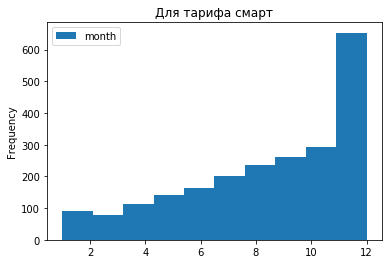

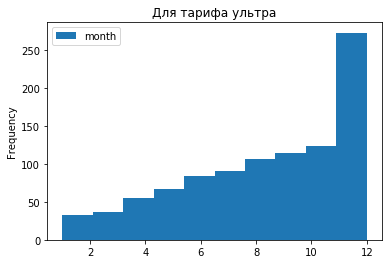

In [18]:
data_smart = all_datas.query('tariff == "smart"')
data_ultra = all_datas.query('tariff == "ultra"')
data_smart.plot(x = "month_receipts", y = ["tariff", "month"], kind = "hist", title = "Для тарифа смарт")
data_ultra.plot(x = "month_receipts", y = ["tariff", "month"], kind = "hist", title = "Для тарифа ультра")

# Шаг 3: Вывод

Я высчитал дисперсию и стандартное отклонение раздельно для тарифа ультра и смарт. Таким образом в дальнейшем я смогу быстрее анализировать различие между тарифами. 


Можно наглядно, увидеть, что в суммарном значении пакет смарт приносит больше дохода компании.

# Шаг 4

In [19]:

smart_rev = data_smart["month_receipts"]
ultra_rev = data_ultra["month_receipts"]
smart_rev.mean()

1231.8308658591297

In [20]:
#Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
#Нулевая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» не равна
#Единичная гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» равна
from scipy import stats as st
alpha = .05
results = st.ttest_ind(ultra_rev, smart_rev)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.499819016049064e-191
Отвергаем нулевую гипотезу


In [21]:
data_mos = all_datas.query('city == "Москва"')
data_rus = all_datas.query('city != "Москва"')
mos_rev = data_mos["month_receipts"]
rus_rev = data_rus["month_receipts"]
print("Средний доход с Москвы:")
display(mos_rev.mean())
print("Средний доход с регионов:")
display(rus_rev.mean())
mos_tariff = data_mos.groupby("tariff")["user_id"].count()
display(mos_tariff)
rus_tariff = data_rus.groupby("tariff")["user_id"].count()
rus_tariff

Средний доход с Москвы:


1504.9787234042553

Средний доход с регионов:


1481.1406069919324

tariff
smart    386
ultra    225
Name: user_id, dtype: int64

tariff
smart    1843
ultra     760
Name: user_id, dtype: int64

In [22]:
#Гипотеза: средняя выручка пользователей
#из Москвы отличается от выручки пользователей из других регионов
#Нулевая гипотеза: средняя выручка пользователей тарифов в Москве и в регионах не равна 
#Единичная гипотеза: средняя выручка пользователей тарифов в Москве и в регионах равна
alpha = .05
results = st.ttest_ind(rus_rev, mos_rev)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4990177745457379
Не получилось отвергнуть нулевую гипотезу


# Шаг 4: Вывод
Мне были даны две гипотезы, которые я проверил. Оказалось, что обе эти гипотезы верны, как нулевую гипотезу я выбрал в обоих случаях как отрицание основной гипотезе. Я проверял гипотезу приняв 2 датасэта как среднее двух генеральный совокупностей, что позволило мне и все манипуляции выше.

# Шаг 5: Общий Вывод

Подводя итоги работы, я исправил ошибки в данных, так же объединил таблицы и высчитал различные параметры, которые говорили о следующем, люди, покупающие тариф ультра, очень редко доплачивают дополнительные услуги такие как покупка доп гигабайтов. То есть в среднем люди платят фиксированную цену за этот тариф, а вот люди с тарифом смарт не хватает и приходиться переплачивать. Предполагаю, что цена за ультра слишком для них дорога, а тариф смарт слишком мало в себя включает. Людям никогда не нравиться переплачивать за дополнительные услуги, и думаю, что такой "средний класс" может уйти к другому оператору, где будет, что-то среднее между ультра и смарт. Таким образом, советую создать дополнительный пакет, что будет между тарифами смарт и ультра. 


Компания зарабатывает больше с тарифа смарт, из-за того, что многим людям не хватает тарифного плана и им приходиться доплачивать за дополнительные услуги. Это очень выгодно для компании. С одной стороны, если добавить еще один тариф между тарифом ультра и смарт, то компанию в потенциале может привлечь новых клиентов, но люди, переплачивающие за тариф смарт тоже могут перейти в новый тариф, и в потенциале платить меньше. Для этого нужны дополнительные исследования. По поводу, разницы в регионах и в Москве, средний счет выше в столице, так как люди переплачивают больше за тариф смарт в среднем, чем в регионах.